In [3]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_datareader as web
import datetime
import seaborn as sns

# 解决绘图出现中文乱码的问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [4]:
#mchi.head(),voo.head(),vea.head()

In [5]:
#pf_data0 = pd.concat([mchi,voo,ewj,ewg,ewu],axis=1)
pf_data0 = pd.read_csv('GLobal_Top5.csv',index_col='Date',parse_dates=True)
#构建数据集便于后续快速计算，默认以最大数量对齐，也可指定起始日期
start_date = pf_data0.dropna().index[0]
pf_data = pf_data0[pf_data0.index >= start_date].dropna()
pf_data.columns=['CN','US','JP','GER','UK']
pf_data.head()

,CN,US,JP,GER,UK
Date,,,,,
2011-03-31,43.866844,102.921066,36.956802,21.707392,26.690020
2011-04-01,44.475403,103.396446,36.885174,22.067089,27.047680
2011-04-04,45.422050,103.447395,36.383827,22.100548,27.241409
2011-04-05,45.151573,103.447395,35.667606,22.041994,27.435137
2011-04-06,45.379784,103.752998,35.345314,22.376595,27.658672


In [6]:
#pf_data.to_csv('GLobal_Top5.csv')

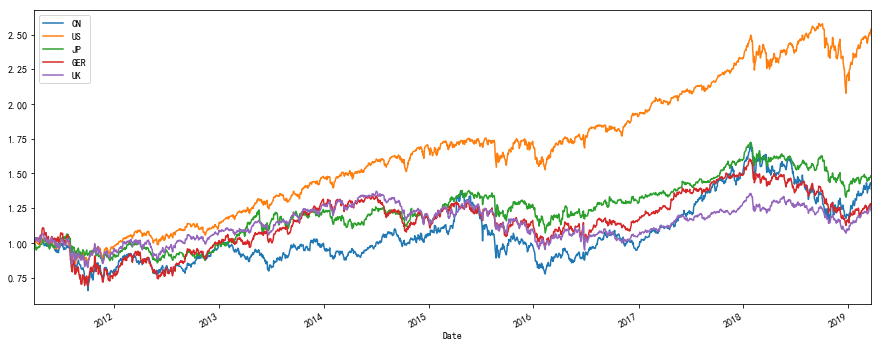

In [7]:
(pf_data/pf_data.iloc[0]).plot(figsize=(15,6))

In [8]:
#统计对齐后的数据集
start_date = datetime.datetime.strftime(pf_data.index[0],"%Y/%m/%d")
end_date = datetime.datetime.strftime(pf_data.index[-1],"%Y/%m/%d")
days_num = round((pf_data.index[-1] - pf_data.index[0]).days / 365 ,2)
print('统计区间：{} ~ {}，共{}年'.format(start_date,end_date,days_num))
pf_stats = pd.DataFrame(index=['区间总收益率','年化收益率'],columns=pf_data.columns)
#pf_stats.loc['统计周期']=datetime.datetime.strftime(pf_data.index[0],"%Y/%m/%d")+'~'+datetime.datetime.strftime(pf_data.index[-1],"%Y/%m/%d")
pf_stats.loc['区间总收益率']=pf_data.iloc[-1]/pf_data.iloc[0]-1
pf_stats.loc['年化收益率']= ((((pf_data.iloc[-1]) / pf_data.iloc[0])) ** (360/(pf_data.index[-1]-pf_data.index[0]).days)) - 1
#格式化百分数输出
pf_stats.loc['区间总收益率'] = pf_stats.loc['区间总收益率'].apply(lambda x: format(x, '.2%'))
pf_stats.loc['年化收益率'] = pf_stats.loc['年化收益率'].apply(lambda x: format(x, '.2%'))
pf_stats

统计区间：2011/03/31 ~ 2019/03/22，共7.98年


,CN,US,JP,GER,UK
区间总收益率,38.72%,149.18%,46.87%,23.18%,23.49%
年化收益率,4.13%,11.94%,4.87%,2.61%,2.64%


In [9]:
pf_yearly = pf_data.resample('BY').last()
pf_yearly.index = pf_yearly.index.year #把index规整下不然图表里会显示一长串日期
pf_yearly.pct_change()

,CN,US,JP,GER,UK
Date,,,,,
2011,NaN,NaN,NaN,NaN,NaN
2012,0.232133,0.159928,0.092203,0.322927,0.152623
2013,0.021834,0.323865,0.259968,0.308465,0.195329
2014,0.068411,0.135571,-0.062262,-0.119560,-0.075983
2015,-0.089950,0.013251,0.081621,-0.027861,-0.087753
2016,-0.003230,0.121667,0.021582,0.036090,-0.024245
2017,0.546697,0.217736,0.242643,0.274216,0.215396
2018,-0.197864,-0.045007,-0.141010,-0.213974,-0.142974
2019,0.156404,0.122247,0.070823,0.054832,0.122998


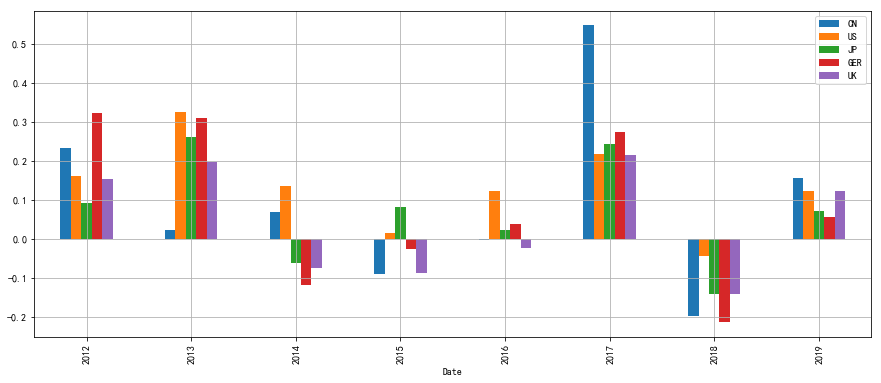

In [10]:
_= pf_yearly.pct_change().dropna().plot(kind='bar',figsize=(15,6),grid=True)

In [11]:
pf_daily_pct = pf_data.pct_change()
pf_daily_pct.describe()
#sns.pairplot(pf_daily)

,CN,US,JP,GER,UK
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
mean,0.000273,0.000497,0.000250,0.000203,0.000170
std,0.014854,0.009158,0.010763,0.014019,0.011349
min,-0.082112,-0.064128,-0.060721,-0.102032,-0.119637
25%,-0.008299,-0.003212,-0.005267,-0.006023,-0.005039
50%,0.000209,0.000595,0.000786,0.000639,0.000575
75%,0.008859,0.005050,0.006114,0.007231,0.006121
max,0.093784,0.050588,0.051525,0.081642,0.070998


In [12]:
#_ = pf_daily_pct.hist(figsize=(6,12),bins=100,sharex=True,sharey=True,layout=(5,1))

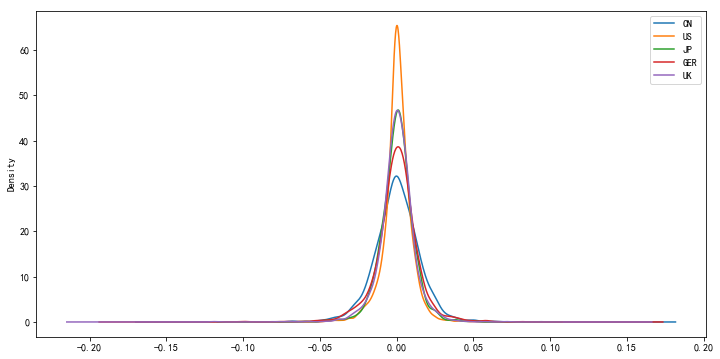

In [13]:
_ = pf_daily_pct.plot(kind='kde',figsize=(12,6))

D:\Anaconda3\envs\learningPY3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\learningPY3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


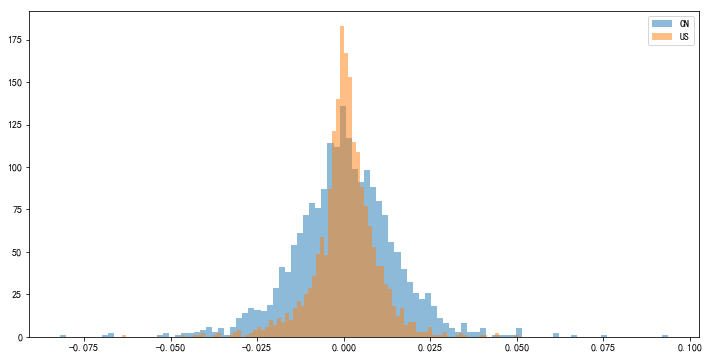

In [14]:
plt.figure(figsize=(12,6))
plt.hist(pf_daily_pct.CN,bins=100,label='CN',alpha=0.5)
plt.hist(pf_daily_pct.US,bins=100,label='US',alpha=0.5)
plt.legend()

In [15]:
pf_monthly_pct = pf_data.resample('BM').last().pct_change()

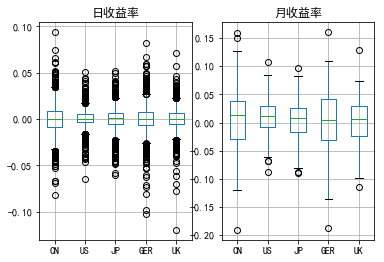

In [16]:
plt.subplot(121,title='日收益率')
pf_daily_pct.boxplot()
plt.subplot(122,title='月收益率')
pf_monthly_pct.boxplot()

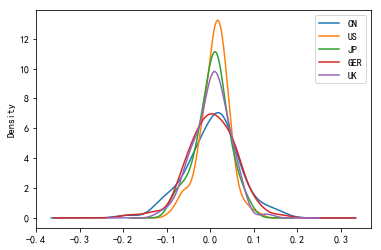

In [17]:
pf_monthly_pct.plot(kind='kde')

In [27]:
holding_1y = pf_data.shift(-250)/pf_data-1
holding_1y.describe()

,CN,US,JP,GER,UK
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,0.084906,0.141413,0.075422,0.074620,0.041918
std,0.203502,0.087150,0.121707,0.173687,0.119967
min,-0.355302,-0.109837,-0.169141,-0.289572,-0.234753
25%,-0.052599,0.074760,-0.018313,-0.069279,-0.054775
50%,0.069069,0.157560,0.073882,0.066804,0.064440
75%,0.217016,0.200701,0.164663,0.235502,0.144686
max,0.661021,0.345873,0.399326,0.444578,0.288371


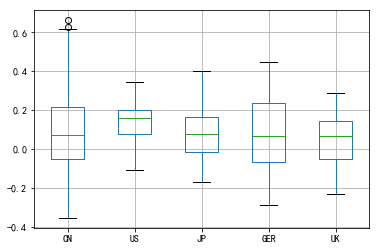

In [28]:
holding_1y.boxplot()

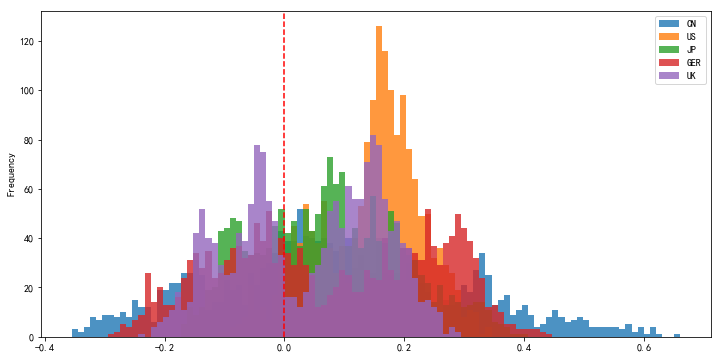

In [29]:
_ = holding_1y.plot(kind='hist',figsize=(12,6),bins=100,alpha=0.8)
plt.axvline(0, c='r', ls='--')

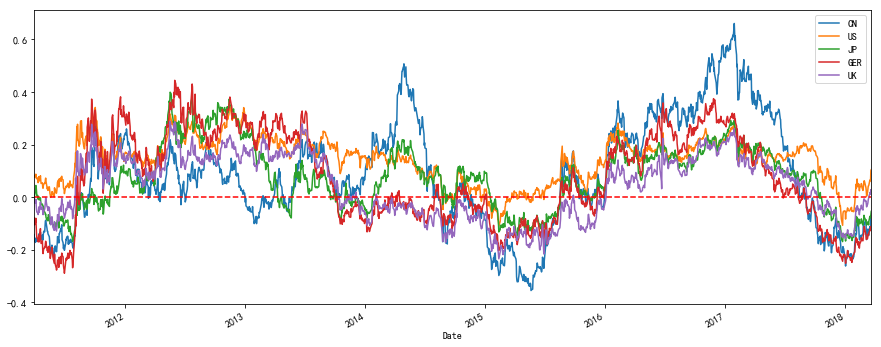

In [42]:
holding_1y.dropna().plot(figsize=(15,6))
_ = plt.axhline(0, c='r', ls='--')

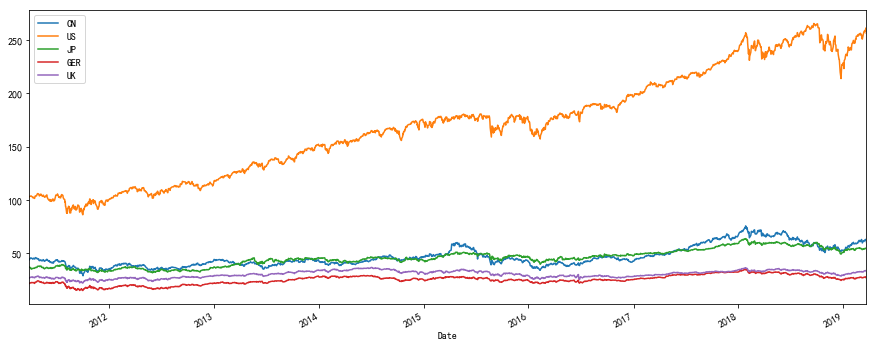

In [39]:
_ = pf_data.plot(figsize=(15,6))

In [30]:
holding_1y_group = pd.DataFrame(index=['<-10%','-10%-0','0-5%','5%-10%','>10%'],columns=pf_data.columns)
holding_1y_group.iloc[0] = holding_1y[holding_1y<-0.1 ].count()/holding_1y.count()
holding_1y_group.iloc[1] = holding_1y[(holding_1y<0) & (holding_1y>-0.1)].count()/holding_1y.count()
holding_1y_group.iloc[2] = holding_1y[(holding_1y>0) & (holding_1y<=0.05) ].count()/holding_1y.count()
holding_1y_group.iloc[3] = holding_1y[(holding_1y>0.05) & (holding_1y<=0.1)].count()/holding_1y.count()
holding_1y_group.iloc[4] = holding_1y[(holding_1y>0.1)].count()/holding_1y.count()
#holding_1y_group.iloc[4] = holding_1y_group.iloc[0:4].sum()
holding_compare = holding_1y_group.copy() #copy一份用于格式化展示，原数据用于绘制饼图
for i in range(len(holding_1y_group)):
    holding_compare.iloc[i] = holding_1y_group.iloc[i].apply(lambda x: format(x, '.2%'))
holding_compare

,CN,US,JP,GER,UK
<-10%,19.64%,0.11%,7.06%,19.18%,15.65%
-10%-0,14.40%,6.83%,22.71%,20.89%,26.81%
0-5%,11.61%,12.01%,12.29%,8.54%,4.78%
5%-10%,10.13%,10.93%,17.64%,5.07%,12.18%
>10%,44.22%,70.12%,40.30%,46.33%,40.58%


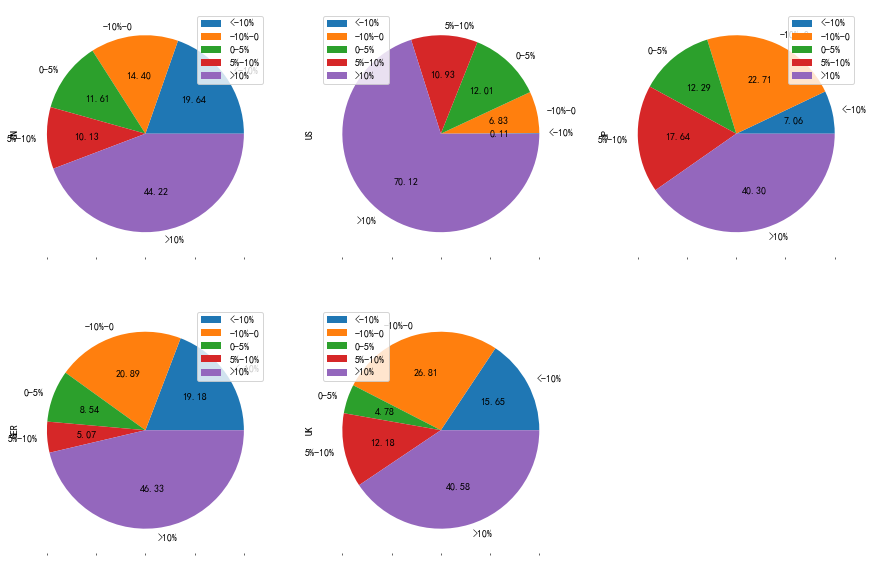

In [31]:
_ = holding_1y_group.plot(subplots=True,kind='pie',layout=(2,3),figsize=(15,10),autopct='%.2f')

In [32]:
pf_stats1 = pd.DataFrame(index=['一个月绝对胜率','半年绝对胜率','一年绝对胜率','两年绝对胜率'],columns=pf_data.columns)
pf_stats1.iloc[0]= (pf_data/pf_data.shift(21)-1)[(pf_data/pf_data.shift(21)-1)>0].count()/(pf_data/pf_data.shift(21)-1).count()
pf_stats1.iloc[1]= (pf_data/pf_data.shift(125)-1)[(pf_data/pf_data.shift(125)-1)>0].count()/(pf_data/pf_data.shift(125)-1).count()
pf_stats1.iloc[2]= (pf_data/pf_data.shift(250)-1)[(pf_data/pf_data.shift(250)-1)>0].count()/(pf_data/pf_data.shift(250)-1).count()
pf_stats1.iloc[3]= (pf_data/pf_data.shift(500)-1)[(pf_data/pf_data.shift(500)-1)>0].count()/(pf_data/pf_data.shift(500)-1).count()
for i in range(len(pf_stats1)):
    pf_stats1.iloc[i] = pf_stats1.iloc[i].apply(lambda x: format(x, '.2%'))
pf_stats.append(pf_stats1)

,CN,US,JP,GER,UK
区间总收益率,38.72%,149.18%,46.87%,23.18%,23.49%
年化收益率,4.13%,11.94%,4.87%,2.61%,2.64%
一个月绝对胜率,54.48%,67.77%,57.55%,56.34%,55.39%
半年绝对胜率,60.63%,84.70%,61.69%,60.10%,63.12%
一年绝对胜率,65.96%,93.06%,70.23%,59.93%,57.54%
两年绝对胜率,71.00%,100.00%,94.16%,72.59%,67.09%
